<a href="https://colab.research.google.com/github/fedhere/PyBOOT/blob/master/pyboot2020_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas  #for tabular data manipulation includes excellent dates package

In [11]:
pandas.__version__

'1.0.5'

In [12]:
import numpy #for numerical computations

In [13]:
import sklearn #for machine lerning

In [17]:
import matplotlib

In [18]:
matplotlib.__version__

'3.2.2'

In [14]:
import matplotlib.pyplot as plt # for plotting

In [16]:
plt.__doc__

'\n`matplotlib.pyplot` is a state-based interface to matplotlib. It provides\na MATLAB-like way of plotting.\n\npyplot is mainly intended for interactive plots and simple cases of\nprogrammatic plot generation::\n\n    import numpy as np\n    import matplotlib.pyplot as plt\n\n    x = np.arange(0, 5, 0.1)\n    y = np.sin(x)\n    plt.plot(x, y)\n\nThe object-oriented API is recommended for more complex plots.\n'

In [20]:
from statsmodels.formula.api import ols # for  simple statistical models with powerful diagnostics

In [21]:
ols?

In [25]:
# importgina a package that is not installed
import emcee

ModuleNotFoundError: ignored

In [26]:
!pip install emcee

     |████████████████████████████████| 51kB 2.4MB/s 


In [22]:
#############################

In [ ]:
import pandas as pd

In [36]:
# reading in data from a url
pd.read_csv("https://data.delaware.gov/api/views/jumg-zbb3/rows.csv?accessType=DOWNLOAD")

,County,Location Lat-Long,Cleanup Type,Cleanup Date,Cleanup Site,Adults,Children,People,Pounds,Miles,Bags,Cigarette Butts,Food Wrappers,Take Out/Away Containers (Plastic),Take Out/Away Containers (Foam),Bottle Caps (Plastic),Bottle Caps (Metal),Lids (Plastic),"Straws, Stirrers","Forks, Knives, Spoons",Beverage Bottles (Plastic),Beverage Bottles (Glass),Beverage Cans,Grocery Bags (Plastic),Other Plastic Bags,Paper Bags,"Cups, Plates (Paper)","Cups, Plates (Plastic)","Cups, Plates (Foam)","Fishing Buoys, Pots & Traps",Fishing Net & Pieces,Fishing Line,Rope,6-Pack Holders,Other Plastic/Foam Packaging,Other Plastic Bottles,Strapping Bands,Tobacco Packaging/Wrap,Appliances,Balloons,Cigar Tips,Cigarette Lighters,Construction Materials,Fireworks,Tires,Toys,Condoms,Diapers,Syringes,Tampons/Tampon Applicators,Foam Pieces,Glass Pieces,Plastic Pieces,"Clothing, Shoes",Shotgun Shells/Wadding,Light Bulbs/Tubes,Batteries,Cars/Car Parts,55-Gallon Drums
0,Kent,"(39.102739, -75.402356)",Beach,09/20/2008,Kitts Hummock,NaN,NaN,45,1500.0,1.00,21,8.0,64.0,NaN,NaN,141.0,73.0,NaN,52.0,31.0,111.0,40.0,123.0,81.0,NaN,19.0,NaN,NaN,NaN,20,1.0,28.0,12.0,4.0,6.0,15.0,4.0,4.0,NaN,26.0,16.0,27.0,219,NaN,4.0,11.0,NaN,NaN,3.0,15.0,NaN,NaN,NaN,11.0,70.0,1.0,NaN,4.0,3.0
1,Kent,"(39.085748, -75.421875)",Beach,09/20/2008,Ted Harvey WLA/ Ted Harvey Wildlife Area,NaN,NaN,45,165.0,2.00,13,4.0,12.0,NaN,NaN,18.0,NaN,NaN,21.0,23.0,62.0,18.0,46.0,28.0,NaN,NaN,NaN,NaN,NaN,5,NaN,3.0,10.0,2.0,5.0,14.0,NaN,NaN,NaN,10.0,NaN,5.0,0,NaN,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,33.0,2.0,NaN,NaN,NaN
2,New Castle,"(39.738765, -75.53939)",Beach,09/20/2008,E. 7th Street - Barbiarz Park,NaN,NaN,18,180.0,1.00,18,172.0,100.0,NaN,NaN,68.0,7.0,NaN,43.0,35.0,68.0,41.0,70.0,133.0,NaN,44.0,NaN,NaN,NaN,21,NaN,32.0,7.0,NaN,2.0,2.0,NaN,11.0,1.0,0.0,4.0,8.0,7,NaN,NaN,11.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,2.0,4.0,3.0,NaN
3,New Castle,"(39.664715, -75.557785)",Beach,09/20/2008,Battery Park,NaN,NaN,51,892.0,0.50,52,541.0,871.0,NaN,NaN,1446.0,112.0,NaN,598.0,303.0,759.0,206.0,111.0,290.0,NaN,52.0,NaN,NaN,NaN,13,2.0,8.0,33.0,18.0,23.0,30.0,25.0,25.0,0.0,20.0,163.0,43.0,104,NaN,10.0,122.0,3.0,NaN,26.0,48.0,NaN,NaN,NaN,37.0,12.0,2.0,0.0,19.0,0.0
4,New Castle,"(39.504724, -75.580976)",Beach,09/20/2008,Augustine Beach Boat Ramp,NaN,NaN,70,2200.0,1.00,0,75.0,7.0,NaN,NaN,110.0,2.0,NaN,80.0,25.0,200.0,40.0,20.0,60.0,NaN,20.0,NaN,NaN,NaN,3,2.0,4.0,2.0,7.0,11.0,2.0,1.0,5.0,1.0,1.0,9.0,7.0,10,NaN,NaN,3.0,NaN,5.0,NaN,5.0,NaN,NaN,NaN,14.0,NaN,NaN,NaN,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,Kent,"(39.330540817256, -75.470104303979)","Land (beach, shoreline and inland)",09/22/2018,Woodland Beach Pier,6.0,4.0,10,95.0,0.75,6,135.0,16.0,1.0,0.0,36.0,17.0,4.0,12.0,3.0,31.0,16.0,20.0,2.0,2.0,3.0,2.0,2.0,2.0,0,1.0,10.0,4.0,1.0,0.0,3.0,1.0,8.0,0.0,1.0,10.0,4.0,0,0.0,0.0,0.0,2.0,2.0,2.0,1.0,20.0,43.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN
445,Kent,"(39.340537155394, -75.487814336855)","Land (beach, shoreline and inland)",09/22/2018,Woodland Beach-Taylor's Gut,12.0,3.0,15,95.0,1.00,6,130.0,46.0,15.0,3.0,7.0,1.0,3.0,10.0,0.0,70.0,34.0,90.0,12.0,9.0,12.0,16.0,2.0,0.0,0,0.0,0.0,1.0,1.0,14.0,1.0,1.0,12.0,0.0,1.0,1.0,2.0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN
446,Sussex,"(38.789097986218, -75.157007597219)","Land (beach, shoreline and inland)",09/22/2018,Lewes Boat Ramp,7.0,2.0,9,150.0,0.50,6,118.0,40.0,16.0,6.0,21.0,29.0,15.0,16.0,6.0,31.0,22.0,26.0,20.0,22.0,4.0,12.0,8.0,9.0,2,6.0,8.0,11.0,3.0,20.0,2.0,7.0,2.0,0.0,2.0,8.0,0.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,9.0,94.0,NaN,NaN,NaN,NaN,NaN,NaN
447,Sussex,"(38.645629073549, -75.6005945823)","Land (beach, shoreline and inland)",09/22/2018,Williams Pond - Seaford,20.0,4.0,24,211.0,5.00,21,374.0,682.0,415.0,198.0,227.0,230.0,68.0,141.0,59.0,349.0,132

In [30]:
pd.read_csv?

In [31]:
pd.DataFrame?

# reading in data from costal cleanup in Delaware from 2008 to 2018

In [37]:
cleanupdf = pd.read_csv("https://data.delaware.gov/api/views/jumg-zbb3/rows.csv?accessType=DOWNLOAD")

In [38]:
cleanupdf

,County,Location Lat-Long,Cleanup Type,Cleanup Date,Cleanup Site,Adults,Children,People,Pounds,Miles,Bags,Cigarette Butts,Food Wrappers,Take Out/Away Containers (Plastic),Take Out/Away Containers (Foam),Bottle Caps (Plastic),Bottle Caps (Metal),Lids (Plastic),"Straws, Stirrers","Forks, Knives, Spoons",Beverage Bottles (Plastic),Beverage Bottles (Glass),Beverage Cans,Grocery Bags (Plastic),Other Plastic Bags,Paper Bags,"Cups, Plates (Paper)","Cups, Plates (Plastic)","Cups, Plates (Foam)","Fishing Buoys, Pots & Traps",Fishing Net & Pieces,Fishing Line,Rope,6-Pack Holders,Other Plastic/Foam Packaging,Other Plastic Bottles,Strapping Bands,Tobacco Packaging/Wrap,Appliances,Balloons,Cigar Tips,Cigarette Lighters,Construction Materials,Fireworks,Tires,Toys,Condoms,Diapers,Syringes,Tampons/Tampon Applicators,Foam Pieces,Glass Pieces,Plastic Pieces,"Clothing, Shoes",Shotgun Shells/Wadding,Light Bulbs/Tubes,Batteries,Cars/Car Parts,55-Gallon Drums
0,Kent,"(39.102739, -75.402356)",Beach,09/20/2008,Kitts Hummock,NaN,NaN,45,1500.0,1.00,21,8.0,64.0,NaN,NaN,141.0,73.0,NaN,52.0,31.0,111.0,40.0,123.0,81.0,NaN,19.0,NaN,NaN,NaN,20,1.0,28.0,12.0,4.0,6.0,15.0,4.0,4.0,NaN,26.0,16.0,27.0,219,NaN,4.0,11.0,NaN,NaN,3.0,15.0,NaN,NaN,NaN,11.0,70.0,1.0,NaN,4.0,3.0
1,Kent,"(39.085748, -75.421875)",Beach,09/20/2008,Ted Harvey WLA/ Ted Harvey Wildlife Area,NaN,NaN,45,165.0,2.00,13,4.0,12.0,NaN,NaN,18.0,NaN,NaN,21.0,23.0,62.0,18.0,46.0,28.0,NaN,NaN,NaN,NaN,NaN,5,NaN,3.0,10.0,2.0,5.0,14.0,NaN,NaN,NaN,10.0,NaN,5.0,0,NaN,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,33.0,2.0,NaN,NaN,NaN
2,New Castle,"(39.738765, -75.53939)",Beach,09/20/2008,E. 7th Street - Barbiarz Park,NaN,NaN,18,180.0,1.00,18,172.0,100.0,NaN,NaN,68.0,7.0,NaN,43.0,35.0,68.0,41.0,70.0,133.0,NaN,44.0,NaN,NaN,NaN,21,NaN,32.0,7.0,NaN,2.0,2.0,NaN,11.0,1.0,0.0,4.0,8.0,7,NaN,NaN,11.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,2.0,4.0,3.0,NaN
3,New Castle,"(39.664715, -75.557785)",Beach,09/20/2008,Battery Park,NaN,NaN,51,892.0,0.50,52,541.0,871.0,NaN,NaN,1446.0,112.0,NaN,598.0,303.0,759.0,206.0,111.0,290.0,NaN,52.0,NaN,NaN,NaN,13,2.0,8.0,33.0,18.0,23.0,30.0,25.0,25.0,0.0,20.0,163.0,43.0,104,NaN,10.0,122.0,3.0,NaN,26.0,48.0,NaN,NaN,NaN,37.0,12.0,2.0,0.0,19.0,0.0
4,New Castle,"(39.504724, -75.580976)",Beach,09/20/2008,Augustine Beach Boat Ramp,NaN,NaN,70,2200.0,1.00,0,75.0,7.0,NaN,NaN,110.0,2.0,NaN,80.0,25.0,200.0,40.0,20.0,60.0,NaN,20.0,NaN,NaN,NaN,3,2.0,4.0,2.0,7.0,11.0,2.0,1.0,5.0,1.0,1.0,9.0,7.0,10,NaN,NaN,3.0,NaN,5.0,NaN,5.0,NaN,NaN,NaN,14.0,NaN,NaN,NaN,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,Kent,"(39.330540817256, -75.470104303979)","Land (beach, shoreline and inland)",09/22/2018,Woodland Beach Pier,6.0,4.0,10,95.0,0.75,6,135.0,16.0,1.0,0.0,36.0,17.0,4.0,12.0,3.0,31.0,16.0,20.0,2.0,2.0,3.0,2.0,2.0,2.0,0,1.0,10.0,4.0,1.0,0.0,3.0,1.0,8.0,0.0,1.0,10.0,4.0,0,0.0,0.0,0.0,2.0,2.0,2.0,1.0,20.0,43.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN
445,Kent,"(39.340537155394, -75.487814336855)","Land (beach, shoreline and inland)",09/22/2018,Woodland Beach-Taylor's Gut,12.0,3.0,15,95.0,1.00,6,130.0,46.0,15.0,3.0,7.0,1.0,3.0,10.0,0.0,70.0,34.0,90.0,12.0,9.0,12.0,16.0,2.0,0.0,0,0.0,0.0,1.0,1.0,14.0,1.0,1.0,12.0,0.0,1.0,1.0,2.0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN
446,Sussex,"(38.789097986218, -75.157007597219)","Land (beach, shoreline and inland)",09/22/2018,Lewes Boat Ramp,7.0,2.0,9,150.0,0.50,6,118.0,40.0,16.0,6.0,21.0,29.0,15.0,16.0,6.0,31.0,22.0,26.0,20.0,22.0,4.0,12.0,8.0,9.0,2,6.0,8.0,11.0,3.0,20.0,2.0,7.0,2.0,0.0,2.0,8.0,0.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,9.0,94.0,NaN,NaN,NaN,NaN,NaN,NaN
447,Sussex,"(38.645629073549, -75.6005945823)","Land (beach, shoreline and inland)",09/22/2018,Williams Pond - Seaford,20.0,4.0,24,211.0,5.00,21,374.0,682.0,415.0,198.0,227.0,230.0,68.0,141.0,59.0,349.0,132

In [34]:
cleanupdf.columns

Index(['County', 'Location Lat-Long', 'Cleanup Type', 'Cleanup Date',
       'Cleanup Site', 'Adults', 'Children', 'People', 'Pounds', 'Miles',
       'Bags', 'Cigarette Butts', 'Food Wrappers',
       'Take Out/Away Containers (Plastic)', 'Take Out/Away Containers (Foam)',
       'Bottle Caps (Plastic)', 'Bottle Caps (Metal)', 'Lids (Plastic)',
       'Straws, Stirrers', 'Forks, Knives, Spoons',
       'Beverage Bottles (Plastic)', 'Beverage Bottles (Glass)',
       'Beverage Cans', 'Grocery Bags (Plastic)', 'Other Plastic Bags',
       'Paper Bags', 'Cups, Plates (Paper)', 'Cups, Plates (Plastic)',
       'Cups, Plates (Foam)', 'Fishing Buoys, Pots & Traps',
       'Fishing Net & Pieces', 'Fishing Line', 'Rope', '6-Pack Holders',
       'Other Plastic/Foam Packaging', 'Other Plastic Bottles',
       'Strapping Bands', 'Tobacco Packaging/Wrap', 'Appliances', 'Balloons',
       'Cigar Tips', 'Cigarette Lighters', 'Construction Materials',
       'Fireworks', 'Tires', 'Toys', 'Condoms',

In [229]:
cleanupdf.describe() #summary statistics for all numerical columns

,Adults,Children,People,Pounds,Miles,Bags,Cigarette Butts,Food Wrappers,Take Out/Away Containers (Plastic),Take Out/Away Containers (Foam),Bottle Caps (Plastic),Bottle Caps (Metal),Lids (Plastic),"Straws, Stirrers","Forks, Knives, Spoons",Beverage Bottles (Plastic),Beverage Bottles (Glass),Beverage Cans,Grocery Bags (Plastic),Other Plastic Bags,Paper Bags,"Cups, Plates (Paper)","Cups, Plates (Plastic)","Cups, Plates (Foam)","Fishing Buoys, Pots & Traps",Fishing Net & Pieces,Fishing Line,Rope,6-Pack Holders,Other Plastic/Foam Packaging,Other Plastic Bottles,Strapping Bands,Tobacco Packaging/Wrap,Appliances,Balloons,Cigar Tips,Cigarette Lighters,Construction Materials,Fireworks,Tires,Toys,Condoms,Diapers,Syringes,Tampons/Tampon Applicators,Foam Pieces,Glass Pieces,Plastic Pieces,"Clothing, Shoes",Shotgun Shells/Wadding,Light Bulbs/Tubes,Batteries,Cars/Car Parts,55-Gallon Drums,doweek
count,270.000000,270.000000,449.000000,449.000000,449.000000,449.000000,415.000000,423.000000,259.000000,252.000000,424.000000,390.000000,267.000000,417.000000,417.000000,427.000000,421.000000,425.000000,422.000000,265.000000,397.000000,262.000000,261.000000,257.000000,449.000000,339.000000,385.000000,395.000000,338.000000,440.000000,426.000000,372.000000,398.000000,230.000000,392.000000,385.000000,371.000000,449.000000,235.000000,312.000000,279.000000,310.000000,306.000000,256.000000,359.000000,258.000000,253.000000,260.000000,157.000000,142.000000,91.000000,70.000000,97.000000,33.000000,449.000000
mean,25.196296,10.274074,42.204900,288.428174,1.638092,16.207127,418.532530,124.463357,16.656371,8.492063,155.106132,16.379487,25.164794,60.251799,34.347722,95.819672,39.902613,55.155294,47.080569,33.973585,15.292191,12.847328,16.923372,8.863813,7.699332,6.000000,14.293506,13.215190,4.059172,24.068182,6.622066,8.666667,13.479899,0.508696,19.928571,27.509091,7.382749,20.278396,11.234043,2.653846,20.605735,4.535484,1.705882,1.625000,9.016713,50.038760,52.588933,164.900000,17.917197,28.697183,2.901099,2.014286,5.164948,0.969697,4.984410
std,22.565279,12.594582,37.405212,501.374768,1.260311,16.610140,666.326227,157.603056,35.847460,19.841502,210.083267,22.110719,32.686294,102.270810,53.318405,184.550482,67.660128,68.480540,62.935726,37.081034,21.133062,15.338067,19.693074,9.792821,16.362141,9.134757,34.184770,16.848437,8.689981,53.516096,11.941638,10.463989,42.981612,1.923746,29.042609,50.102661,14.130440,35.115632,53.570392,5.099844,43.415619,39.927244,2.776677,4.539154,39.205229,85.537795,186.455272,204.427512,17.275654,52.830787,4.144756,2.475930,6.598106,1.334280,0.226044
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,10.000000,1.000000,16.000000,68.000000,1.000000,6.000000,45.500000,35.000000,3.000000,1.000000,33.750000,3.000000,8.000000,11.000000,5.000000,20.000000,6.000000,12.000000,11.250000,12.000000,3.000000,3.000000,5.000000,2.000000,0.000000,1.000000,2.000000,3.000000,0.000000,3.000000,0.000000,2.000000,3.000000,0.000000,3.000000,3.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,2.000000,46.000000,6.000000,6.000000,1.000000,1.000000,1.000000,0.000000,5.000000
50%,18.000000,5.000000,30.000000,143.000000,1.000000,11.000000,186.000000,69.000000,8.000000,3.000000,75.000000,9.000000,16.000000,28.000000,12.000000,50.000000,18.000000,34.000000,25.000000,24.000000,9.000000,7.500000,11.000000,6.000000,3.000000,3.000000,7.000000,8.000000,1.000000,11.500000,2.000000,5.000000,7.000000,0.000000,9.000000,11.000000,3.000000,10.000000,2.000000,1.000000,2.000000,1.000

In [40]:
cleanupdf["Cleanup Date"] # dates are read in as strings but we can convert them to date objects

0      09/20/2008
1      09/20/2008
2      09/20/2008
3      09/20/2008
4      09/20/2008
          ...    
444    09/22/2018
445    09/22/2018
446    09/22/2018
447    09/22/2018
448    09/22/2018
Name: Cleanup Date, Length: 449, dtype: object

In [72]:
cleanupdf = pd.read_csv("https://data.delaware.gov/api/views/jumg-zbb3/rows.csv?accessType=DOWNLOAD",
                        date_parser=["Cleanup Date"]) 

In [73]:
#not sure why the line of code above did not work. it was supposed to read in the column "Cleanup Date" as dates instead of strings
# it should in principle but some formatting issues in teh data may cause it to fail
cleanupdf["Cleanup Date"]

0      09/20/2008
1      09/20/2008
2      09/20/2008
3      09/20/2008
4      09/20/2008
          ...    
444    09/22/2018
445    09/22/2018
446    09/22/2018
447    09/22/2018
448    09/22/2018
Name: Cleanup Date, Length: 449, dtype: object

i knwo it did not work because it still says it is an "object" as dtype, which stands for "data type"

In [74]:
cleanupdf["Cleanup Date"] = pd.to_datetime(cleanupdf["Cleanup Date"])

In [75]:
cleanupdf["Cleanup Date"]

0     2008-09-20
1     2008-09-20
2     2008-09-20
3     2008-09-20
4     2008-09-20
         ...    
444   2018-09-22
445   2018-09-22
446   2018-09-22
447   2018-09-22
448   2018-09-22
Name: Cleanup Date, Length: 449, dtype: datetime64[ns]

now it is a datetime object. Pandas has amazing date-time functionalities https://www.analyticsvidhya.com/blog/2020/05/datetime-variables-python-pandas/. for example you can get the day of the week (you can do much more amazing things than this)

In [76]:
cleanupdf["Cleanup Date"].dt.weekday.unique()

array([5, 2, 4, 6])

In [77]:
cleanupdf["doweek"] = cleanupdf["Cleanup Date"].dt.weekday

In [78]:
cleanupdf.head()

,County,Location Lat-Long,Cleanup Type,Cleanup Date,Cleanup Site,Adults,Children,People,Pounds,Miles,Bags,Cigarette Butts,Food Wrappers,Take Out/Away Containers (Plastic),Take Out/Away Containers (Foam),Bottle Caps (Plastic),Bottle Caps (Metal),Lids (Plastic),"Straws, Stirrers","Forks, Knives, Spoons",Beverage Bottles (Plastic),Beverage Bottles (Glass),Beverage Cans,Grocery Bags (Plastic),Other Plastic Bags,Paper Bags,"Cups, Plates (Paper)","Cups, Plates (Plastic)","Cups, Plates (Foam)","Fishing Buoys, Pots & Traps",Fishing Net & Pieces,Fishing Line,Rope,6-Pack Holders,Other Plastic/Foam Packaging,Other Plastic Bottles,Strapping Bands,Tobacco Packaging/Wrap,Appliances,Balloons,Cigar Tips,Cigarette Lighters,Construction Materials,Fireworks,Tires,Toys,Condoms,Diapers,Syringes,Tampons/Tampon Applicators,Foam Pieces,Glass Pieces,Plastic Pieces,"Clothing, Shoes",Shotgun Shells/Wadding,Light Bulbs/Tubes,Batteries,Cars/Car Parts,55-Gallon Drums,doweek
0,Kent,"(39.102739, -75.402356)",Beach,2008-09-20,Kitts Hummock,NaN,NaN,45,1500.0,1.0,21,8.0,64.0,NaN,NaN,141.0,73.0,NaN,52.0,31.0,111.0,40.0,123.0,81.0,NaN,19.0,NaN,NaN,NaN,20,1.0,28.0,12.0,4.0,6.0,15.0,4.0,4.0,NaN,26.0,16.0,27.0,219,NaN,4.0,11.0,NaN,NaN,3.0,15.0,NaN,NaN,NaN,11.0,70.0,1.0,NaN,4.0,3.0,5
1,Kent,"(39.085748, -75.421875)",Beach,2008-09-20,Ted Harvey WLA/ Ted Harvey Wildlife Area,NaN,NaN,45,165.0,2.0,13,4.0,12.0,NaN,NaN,18.0,NaN,NaN,21.0,23.0,62.0,18.0,46.0,28.0,NaN,NaN,NaN,NaN,NaN,5,NaN,3.0,10.0,2.0,5.0,14.0,NaN,NaN,NaN,10.0,NaN,5.0,0,NaN,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,33.0,2.0,NaN,NaN,NaN,5
2,New Castle,"(39.738765, -75.53939)",Beach,2008-09-20,E. 7th Street - Barbiarz Park,NaN,NaN,18,180.0,1.0,18,172.0,100.0,NaN,NaN,68.0,7.0,NaN,43.0,35.0,68.0,41.0,70.0,133.0,NaN,44.0,NaN,NaN,NaN,21,NaN,32.0,7.0,NaN,2.0,2.0,NaN,11.0,1.0,0.0,4.0,8.0,7,NaN,NaN,11.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,2.0,4.0,3.0,NaN,5
3,New Castle,"(39.664715, -75.557785)",Beach,2008-09-20,Battery Park,NaN,NaN,51,892.0,0.5,52,541.0,871.0,NaN,NaN,1446.0,112.0,NaN,598.0,303.0,759.0,206.0,111.0,290.0,NaN,52.0,NaN,NaN,NaN,13,2.0,8.0,33.0,18.0,23.0,30.0,25.0,25.0,0.0,20.0,163.0,43.0,104,NaN,10.0,122.0,3.0,NaN,26.0,48.0,NaN,NaN,NaN,37.0,12.0,2.0,0.0,19.0,0.0,5
4,New Castle,"(39.504724, -75.580976)",Beach,2008-09-20,Augustine Beach Boat Ramp,NaN,NaN,70,2200.0,1.0,0,75.0,7.0,NaN,NaN,110.0,2.0,NaN,80.0,25.0,200.0,40.0,20.0,60.0,NaN,20.0,NaN,NaN,NaN,3,2.0,4.0,2.0,7.0,11.0,2.0,1.0,5.0,1.0,1.0,9.0,7.0,10,NaN,NaN,3.0,NaN,5.0,NaN,5.0,NaN,NaN,NaN,14.0,NaN,NaN,NaN,2.0,NaN,5


groupby may be the single most useful function in dataframes: you can group objects based on having the same value of a specific feature

In [79]:
cleanupdf.groupby("doweek").count()

,County,Location Lat-Long,Cleanup Type,Cleanup Date,Cleanup Site,Adults,Children,People,Pounds,Miles,Bags,Cigarette Butts,Food Wrappers,Take Out/Away Containers (Plastic),Take Out/Away Containers (Foam),Bottle Caps (Plastic),Bottle Caps (Metal),Lids (Plastic),"Straws, Stirrers","Forks, Knives, Spoons",Beverage Bottles (Plastic),Beverage Bottles (Glass),Beverage Cans,Grocery Bags (Plastic),Other Plastic Bags,Paper Bags,"Cups, Plates (Paper)","Cups, Plates (Plastic)","Cups, Plates (Foam)","Fishing Buoys, Pots & Traps",Fishing Net & Pieces,Fishing Line,Rope,6-Pack Holders,Other Plastic/Foam Packaging,Other Plastic Bottles,Strapping Bands,Tobacco Packaging/Wrap,Appliances,Balloons,Cigar Tips,Cigarette Lighters,Construction Materials,Fireworks,Tires,Toys,Condoms,Diapers,Syringes,Tampons/Tampon Applicators,Foam Pieces,Glass Pieces,Plastic Pieces,"Clothing, Shoes",Shotgun Shells/Wadding,Light Bulbs/Tubes,Batteries,Cars/Car Parts,55-Gallon Drums
doweek,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,2,2,2,2,2,0,0,2,2,2,2,2,2,0,0,2,2,0,2,2,2,2,2,2,0,1,0,0,0,2,1,2,2,2,2,2,2,2,0,1,2,2,2,0,0,2,2,1,0,2,0,0,0,2,1,1,1,2,0
4,3,3,3,3,3,2,2,3,3,3,3,3,3,2,2,3,3,2,3,3,3,3,3,3,2,3,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,3,3,3,3,3,3,2,2,2,1,1,1,1,1,1
5,442,428,442,442,439,267,267,442,442,442,442,409,417,256,249,418,384,264,411,411,421,415,419,416,262,392,259,258,254,442,334,379,389,333,433,419,366,393,227,387,379,365,442,232,309,274,305,302,253,353,255,251,257,154,140,89,68,94,32
6,2,0,2,2,2,1,1,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,0,2,2,1,0,0,1,1,1,2,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0


groupby has to be associated to a function, for example .count() which is a method of the group object, to act on the grouped object and return a dataframe. ```.count()``` counts the valid entries in the column for each group, ```.sum()``` sums the entries in the column by group, etc ,etc. Note: only the valid entries are counted in ```.count()`` where valid means not NaN. I can inspect and find out how many NaN are in a column as follows:

In [80]:
cleanupdf.County.isna().sum()

0

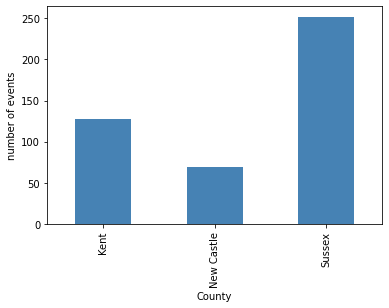

In [81]:
#visualizing counts
cleanupdf.groupby("County").County.count().plot(kind="bar", color="Steelblue");
plt.ylabel("number of events");

# creating bins to group objects

In [84]:
cleanupdf["Pounds"].min()

0.0

In [85]:
cleanupdf["Pounds"].max()

5000.0

In [87]:
list(range(0, 5500, 500))

[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]

In [92]:
cleanupdf.groupby(pd.cut(cleanupdf["Pounds"], range(0, 5500, 500))).count()

,County,Location Lat-Long,Cleanup Type,Cleanup Date,Cleanup Site,Adults,Children,People,Pounds,Miles,Bags,Cigarette Butts,Food Wrappers,Take Out/Away Containers (Plastic),Take Out/Away Containers (Foam),Bottle Caps (Plastic),Bottle Caps (Metal),Lids (Plastic),"Straws, Stirrers","Forks, Knives, Spoons",Beverage Bottles (Plastic),Beverage Bottles (Glass),Beverage Cans,Grocery Bags (Plastic),Other Plastic Bags,Paper Bags,"Cups, Plates (Paper)","Cups, Plates (Plastic)","Cups, Plates (Foam)","Fishing Buoys, Pots & Traps",Fishing Net & Pieces,Fishing Line,Rope,6-Pack Holders,Other Plastic/Foam Packaging,Other Plastic Bottles,Strapping Bands,Tobacco Packaging/Wrap,Appliances,Balloons,Cigar Tips,Cigarette Lighters,Construction Materials,Fireworks,Tires,Toys,Condoms,Diapers,Syringes,Tampons/Tampon Applicators,Foam Pieces,Glass Pieces,Plastic Pieces,"Clothing, Shoes",Shotgun Shells/Wadding,Light Bulbs/Tubes,Batteries,Cars/Car Parts,55-Gallon Drums,doweek
Pounds,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"(0, 500]",395,382,395,395,392,258,258,395,395,395,395,369,374,248,241,376,346,256,371,369,379,373,376,373,254,348,251,250,247,395,302,340,350,293,388,373,330,351,209,347,343,326,395,226,271,238,274,280,224,317,247,242,249,120,107,64,53,65,22,395
"(500, 1000]",30,28,30,30,30,9,9,30,30,30,30,26,27,8,8,27,25,8,25,26,27,26,27,27,8,27,8,8,7,30,21,26,25,24,28,29,23,25,15,25,21,24,30,7,21,23,20,15,17,23,8,8,8,18,18,11,8,15,5,30
"(1000, 1500]",12,11,12,12,12,0,0,12,12,12,12,10,11,0,0,11,9,0,11,11,11,11,11,11,0,11,0,0,0,12,7,9,11,11,12,12,10,11,3,11,10,10,12,0,11,10,9,6,8,10,0,0,0,11,11,10,4,11,4,12
"(1500, 2000]",2,2,2,2,2,0,0,2,2,2,2,2,2,0,0,2,2,0,2,2,2,2,2,2,0,2,0,0,0,2,2,2,2,2,2,2,2,2,0,2,2,2,2,0,2,2,1,2,1,2,0,0,0,2,2,1,2,1,0,2
"(2000, 2500]",3,3,3,3,3,1,1,3,3,3,3,3,3,1,1,3,3,1,3,3,3,3,3,3,1,3,1,1,1,3,3,3,3,3,3,3,2,3,1,3,3,3,3,1,2,2,2,1,2,3,1,1,1,2,1,1,1,2,0,3
"(2500, 3000]",3,3,3,3,3,1,1,3,3,3,3,2,3,1,1,2,3,1,3,3,2,3,3,3,1,3,1,1,1,3,1,2,1,3,3,3,2,3,0,2,3,3,3,0,3,2,2,0,2,2,1,1,1,2,2,2,0,1,1,3
"(3000, 3500]",1,1,1,1,1,0,0,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,1,1,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,0,0,0,1,1,1,1,1,1,1
"(3500, 4000]",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1
"(4000, 4500]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


binning by date

In [235]:
pd.date_range('2007', '2019', freq='1Y')

DatetimeIndex(['2007-12-31', '2008-12-31', '2009-12-31', '2010-12-31',
               '2011-12-31', '2012-12-31', '2013-12-31', '2014-12-31',
               '2015-12-31', '2016-12-31', '2017-12-31', '2018-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [236]:
drage = pd.date_range('2007', '2019', freq='1Y')

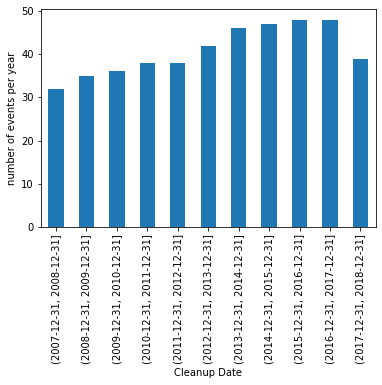

In [237]:
cleanupdf.groupby(pd.cut(cleanupdf["Cleanup Date"], drage)).County.count().plot(kind='bar');
plt.ylabel("number of events per year");

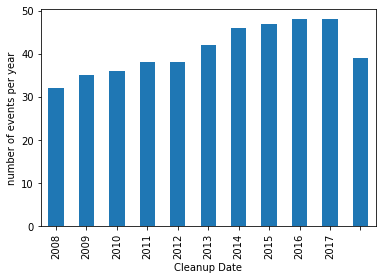

In [240]:
cleanupdf.groupby(pd.cut(cleanupdf["Cleanup Date"], drage)).County.count().plot(kind='bar');
plt.ylabel("number of events per year");
plt.xticks(range(11), ["%d"%y for y in range(2008, 2018)]);

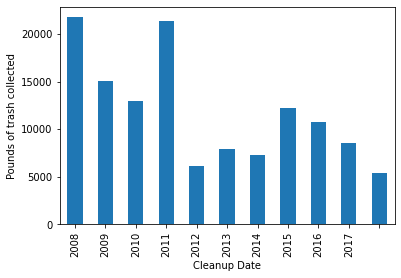

In [241]:
cleanupdf.groupby(pd.cut(cleanupdf["Cleanup Date"], drage)
).Pounds.sum().plot(kind='bar');
plt.ylabel("Pounds of trash collected");
plt.xticks(range(11), ["%d"%y for y in range(2008, 2018)]);

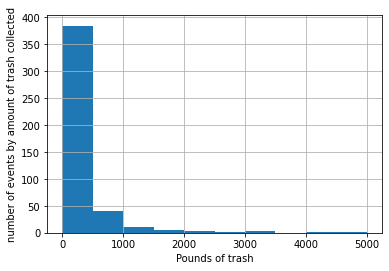

In [243]:
cleanupdf.Pounds.hist();
plt.ylabel("number of events by amount of trash collected");
plt.xlabel("Pounds of trash");

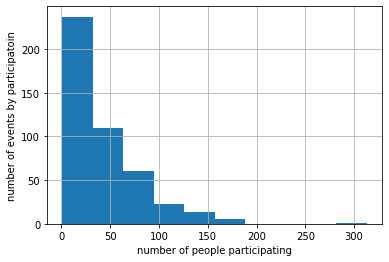

In [244]:
cleanupdf.People.hist();
plt.ylabel("number of events by participatoin");
plt.xlabel("number of people participating");

# explore by county

In [249]:
cleanupdf.County.unique()

array(['Kent', 'New Castle', 'Sussex'], dtype=object)

In [250]:
decounties = cleanupdf.County.unique()

In [251]:
cleanupdf["County"] == "Kent"

0       True
1       True
2      False
3      False
4      False
       ...  
444     True
445     True
446    False
447    False
448     True
Name: County, Length: 449, dtype: bool

In [252]:
cleanupdf[cleanupdf["County"] == "Kent"].shape

(128, 60)

<Figure size 432x288 with 0 Axes>

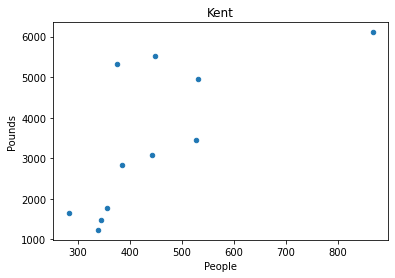

<Figure size 432x288 with 0 Axes>

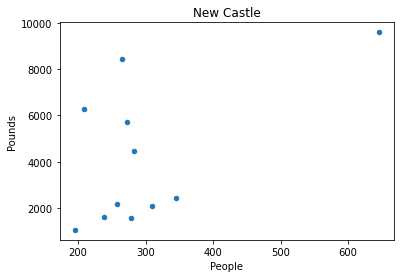

<Figure size 432x288 with 0 Axes>

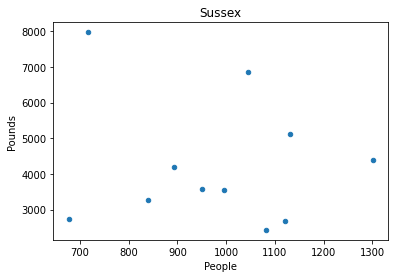

In [253]:
for c in decounties:
  plt.figure();
  df_ = cleanupdf[cleanupdf["County"] == c].groupby(pd.cut(cleanupdf["Cleanup Date"][cleanupdf["County"] == c], 
                                                     drage)).sum()
  df_.plot(x="People", y="Pounds", kind='scatter', title=c);


fitting simple models to data

---



In [254]:
import statsmodels.formula.api as smf

In [261]:
#y = ax + b
mymodel = smf.ols(formula='Pounds ~ People', data=cleanupdf).fit()

Text(0, 0.5, 'Pounds')

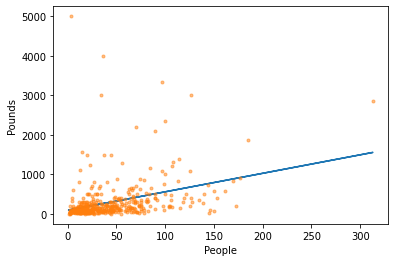

In [256]:
plt.plot(cleanupdf["People"], mymodel.predict(cleanupdf["People"]))
plt.plot(cleanupdf["People"], cleanupdf["Pounds"], '.', alpha=0.5);
plt.xlabel("People")
plt.ylabel("Pounds")

In [257]:
mymodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Pounds   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     62.09
Date:                Fri, 18 Sep 2020   Prob (F-statistic):           2.53e-14
Time:                        17:55:17   Log-Likelihood:                -3399.0
No. Observations:                 449   AIC:                             6802.
Df Residuals:                     447   BIC:                             6810.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     90.8711     33.486      2.714      0.007      25.062     156.681
People         4.6809      0.594      7.879      0.000       3.513       5.848
==============================================================================
Omnibus:                      522.725   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33994.124
Skew:                           5.457   Prob(JB):                         0.00
Kurtosis:                      44.206   Cond. No.                         85.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [262]:
#y = ax**2 + bx + c
mymodel2 = smf.ols(formula='Pounds ~ I(People**2) + People', data=cleanupdf).fit()

In [259]:
mymodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Pounds   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     34.78
Date:                Fri, 18 Sep 2020   Prob (F-statistic):           9.22e-15
Time:                        17:55:58   Log-Likelihood:                -3395.7
No. Observations:                 449   AIC:                             6797.
Df Residuals:                     446   BIC:                             6810.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        156.3283     41.820      3.738      0.000      74.141     238.516
I(People ** 2)     0.0183      0.007      2.584      0.010       0.004       0.032
People             1.7510      1.278      1.370      0.171      -0.761       4.263
==============================================================================
Omnibus:                      527.402   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35005.212
Skew:                           5.536   Prob(JB):                         0.00
Kurtosis:                      44.815   Cond. No.                     1.41e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [264]:
#compare models w likelihood ratio test
mymodel2.compare_lr_test?

In [265]:
# thesecond number is the p-value of ther test
mymodel2.compare_lr_test(mymodel)

(6.672919351967721, 0.009788871726509581, 1.0)

In [144]:
#to plot t i create a dataframe with the exogenous variable
cleanupdf["People"].max()


313

In [268]:
pd.DataFrame({"People": list(range(314))})

,People
0,0
1,1
2,2
3,3
4,4
...,...
309,309
310,310
311,311
312,312


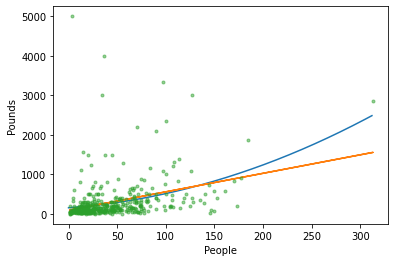

In [271]:
plt.plot(range(313), mymodel2.predict(pd.DataFrame({"People":list(range(313))})))
plt.plot(cleanupdf["People"], mymodel.predict(cleanupdf["People"]))

plt.plot(cleanupdf["People"], cleanupdf["Pounds"], '.', alpha=0.5);
plt.xlabel("People")
plt.ylabel("Pounds");

# quick exploration of numpy indexing

In [270]:
!wget https://github.com/fedhere/PyBOOT/blob/master/busBusses.npy?raw=true

--2020-09-18 18:00:42--  https://github.com/fedhere/PyBOOT/blob/master/busBusses.npy?raw=true
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/fedhere/PyBOOT/raw/master/busBusses.npy [following]
--2020-09-18 18:00:43--  https://github.com/fedhere/PyBOOT/raw/master/busBusses.npy
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fedhere/PyBOOT/master/busBusses.npy [following]
--2020-09-18 18:00:43--  https://raw.githubusercontent.com/fedhere/PyBOOT/master/busBusses.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 240 [app

In [167]:
!wget https://github.com/fedhere/PyBOOT/blob/master/busTimeTable.npy?raw=true

--2020-09-18 15:15:43--  https://github.com/fedhere/PyBOOT/blob/master/busTimeTable.npy?raw=true
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/fedhere/PyBOOT/raw/master/busTimeTable.npy [following]
--2020-09-18 15:15:43--  https://github.com/fedhere/PyBOOT/raw/master/busTimeTable.npy
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fedhere/PyBOOT/master/busTimeTable.npy [following]
--2020-09-18 15:15:44--  https://raw.githubusercontent.com/fedhere/PyBOOT/master/busTimeTable.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
L

In [168]:
import numpy as np

In [169]:
ls

'busBusses.npy?raw=true'    'busTimeTable.npy?raw=true'
'busBusses.npy?raw=true.1'  'busTimeTable.npy?raw=true.1'
 busTimeTable.npy            sample_data/


In [172]:
# a file containing transit time for busses by bis and hour of the day:
#20 busses, 10 times of thre day
tt = np.load("busTimeTable.npy?raw=true")

In [173]:
tt.shape

(20, 10)

In [175]:
busses = np.load("busBusses.npy?raw=true")

In [176]:
busses.shape

(20,)

In [177]:
busses

array([ 77,  72,  79,  97,  85,  57,  86,  96,  31,  76,  33,  98, 109,
       108,  52,  92,  58,  94,  66, 104])

In [273]:
hours = np.arange(1, 11)

In [274]:
def printBusTable(times, i):
    print("{:>3d} ".format(busses[i]), end="")
    for j in times[i]:
        print("{:>7.2f} ".format(j), end="")
    print("\n")

print("{:>3}".format(""), end="")

for k in range(10):
    print("{:>4} PM ".format(hours[k]), end="")
print("")

print("{:>3}".format("BUS"), end="")
print("")

for k in range(20):
    printBusTable(tt, k)

      1 PM    2 PM    3 PM    4 PM    5 PM    6 PM    7 PM    8 PM    9 PM   10 PM 
BUS
 77   91.83   72.99   96.74   73.41   85.58  101.38   96.98   95.56   77.87   78.38 

 72   61.03   60.00   67.86   41.11   53.38   36.92   53.63   55.74   58.57   54.99 

 79   60.98   45.56   45.88   66.16   60.03   50.85   45.38   53.81   54.55   60.64 

 97   87.99   55.80   81.03   66.19   53.30   67.56   74.38   71.14   87.67   67.10 

 85   73.81   79.26   86.31   99.78   90.29   84.38   95.84   84.51   97.12  105.18 

 57   77.14   71.12   52.12   73.46   91.37   72.87   68.71   72.43   61.80   72.27 

 86   86.31  102.23  113.02   95.70   98.60  114.93  104.41  105.50   93.36   98.78 

 96   74.71   80.97   89.16   70.23   81.43   78.39   78.97   72.11   55.52   79.02 

 31   77.93   92.78   69.31   61.53   70.65   76.98   73.42   84.09   63.37   67.99 

 76   49.24   67.66   61.20   51.40   44.91   68.52   78.97   52.58   53.75   54.37 

 33   59.19   70.38   48.61   81.46   64.85   65.33 

In [277]:
hours == 2

array([False,  True, False, False, False, False, False, False, False,
       False])

In [278]:
tt.T[hours == 2]

array([[ 72.99278771,  60.00463334,  45.55742203,  55.8021912 ,
         79.25914025,  71.12444623, 102.23174241,  80.97147937,
         92.77956675,  67.65617269,  70.37804103, 106.12441583,
         53.37348145,  33.19279169,  81.31977757,  76.29909699,
         51.24633613,  61.22026506,  80.80014634,  89.45851705]])

In [279]:
tt.shape

(20, 10)

In [280]:
tt.T.shape

(10, 20)

In [281]:
tt[busses == 77].mean()

87.07284963898903

In [282]:
tt[busses == 77]

array([[ 91.82869011,  72.99278771,  96.74459251,  73.41298391,
         85.58215726, 101.38226456,  96.97680737,  95.56072596,
         77.87195303,  78.37553397]])

In [284]:
tt.T[hours==2].mean()

71.58962255653003

In [285]:
tt.mean(axis=1)

array([ 87.07284964,  54.32223729,  54.38554215,  71.21568138,
        89.64702147,  71.33018484, 101.28441894,  76.05122622,
        73.80479543,  58.25958501,  62.60818564,  83.85318143,
        64.91983233,  38.54594242,  61.47842137,  80.33921739,
        50.13357402,  54.11684661,  70.86680243,  73.45362679])

In [286]:
tt.mean(axis=0)

array([66.89079118, 71.58962256, 69.06093555, 68.20293716, 68.35553274,
       69.88235848, 69.07994486, 69.5488946 , 65.98370986, 70.24985942])

In [287]:
tt.mean(axis=0).max()

71.58962255653003

In [288]:
hours[tt.mean(axis=0) == tt.mean(axis=0).max()]

array([2])

In [289]:
tt

array([[ 91.82869011,  72.99278771,  96.74459251,  73.41298391,
         85.58215726, 101.38226456,  96.97680737,  95.56072596,
         77.87195303,  78.37553397],
       [ 61.03022409,  60.00463334,  67.86228679,  41.10873249,
         53.37659575,  36.91790247,  53.62835897,  55.73660035,
         58.56814116,  54.98889748],
       [ 60.98477297,  45.55742203,  45.88400007,  66.16346096,
         60.03163411,  50.85322708,  45.37677315,  53.8142472 ,
         54.54569551,  60.64418839],
       [ 87.98620643,  55.8021912 ,  81.02751282,  66.19019631,
         53.30000683,  67.55780543,  74.38103569,  71.13924744,
         87.67477883,  67.09783283],
       [ 73.8097995 ,  79.25914025,  86.31085813,  99.77766307,
         90.29078454,  84.37561182,  95.84112464,  84.50840611,
         97.12166748, 105.17515918],
       [ 77.14467806,  71.12444623,  52.12373301,  73.45946947,
         91.36942688,  72.86854378,  68.71403738,  72.43112835,
         61.79702835,  72.26935691],
       [ 8

In [290]:
tt.shape

(20, 10)

In [291]:
for i in range(tt.shape[0]):
  if ((tt[i,:] == tt.max()).sum()):
    print("bus that takes the longest is: ", busses[i])
for j in range(tt.shape[1]):
  if ((tt[:,j] == tt.max()).sum()):
    print("the slowest time for this bus is: ", hours[j])


bus that takes the longest is:  86
the slowest time for this bus is:  6


In [292]:
np.where(tt == tt.max())

(array([6]), array([5]))

In [293]:
tt[np.where(tt == tt.max())]

array([114.93276158])

In [294]:
busses[np.where(tt == tt.max())[0]]

array([86])

In [295]:
hours[np.where(tt == tt.max())[1]]

array([6])